## 6장 2절 다항 회귀(Polynomial Regression)

#### 2. scikit-learn의 PolynomialFeatures

#### 1) 다항 회귀 코드 실습

In [1]:
import pandas as pd

In [2]:
df_cereal = pd.read_csv('./data/cereal.csv')
df_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [3]:
df_cereal = df_cereal[df_cereal.columns[3:]]
df_cereal = df_cereal[df_cereal['sugars']>=0]
df_cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
import matplotlib.pyplot as plt

In [5]:
df_cereal2 = df_cereal.loc[:, ['sugars','rating']]
df_cereal2

,sugars,rating
0,6,68.402973
1,8,33.983679
2,5,59.425505
3,0,93.704912
4,8,34.384843
...,...,...
72,3,39.106174
73,12,27.753301
74,3,49.787445
75,3,51.592193


In [6]:
df_cereal2.sort_values(by='sugars', inplace=True)
df_cereal2

,sugars,rating
20,0,64.533816
54,0,60.756112
55,0,63.005645
3,0,93.704912
63,0,68.235885
...,...,...
52,14,37.840594
6,14,33.174094
70,14,28.592785
66,15,31.230054


In [7]:
df_cereal2.reset_index(drop=True, inplace=True)
df_cereal2

,sugars,rating
0,0,64.533816
1,0,60.756112
2,0,63.005645
3,0,93.704912
4,0,68.235885
...,...,...
71,14,37.840594
72,14,33.174094
73,14,28.592785
74,15,31.230054


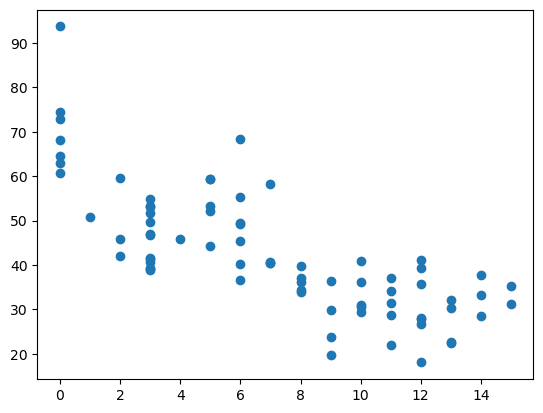

In [8]:
x = df_cereal2['sugars'].values
y = df_cereal2['rating'].values
plt.scatter(x, y)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))

In [13]:
X_poly

array([[  1.,  11., 121.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       [  1.,   6.,  36.],
       [  1.,  12., 144.],
       [  1.,   7.,  49.],
       [  1.,   3.,   9.],
       [  1.,  13., 169.],
       [  1.,   0.,   0.],
       [  1.,  11., 121.],
       [  1.,   9.,  81.],
       [  1.,  12., 144.],
       [  1.,   8.,  64.],
       [  1.,   4.,  16.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  13., 169.],
       [  1.,   9.,  81.],
       [  1.,   1.,   1.],
       [  1.,  14., 196.],
       [  1.,  10., 100.],
       [  1.,   3.,   9.],
       [  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,   6.,  36.],
       [  1.,   9.,  81.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.],
       [  1.,   5.,  25.],
       [  1.,   8.,  64.],
       [  1.,   3.,   9.],
 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [16]:
import numpy as np

In [17]:
X_test_poly = poly_reg.transform(X_test.reshape(-1,1))
X_test_poly

array([[  1.,   3.,   9.],
       [  1.,  11., 121.],
       [  1.,   2.,   4.],
       [  1.,  14., 196.],
       [  1.,  11., 121.],
       [  1.,   5.,  25.],
       [  1.,   7.,  49.],
       [  1.,   6.,  36.],
       [  1.,   6.,  36.],
       [  1.,  12., 144.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,   0.,   0.],
       [  1.,  10., 100.],
       [  1.,   5.,  25.],
       [  1.,   7.,  49.],
       [  1.,   3.,   9.],
       [  1.,   8.,  64.],
       [  1.,   6.,  36.],
       [  1.,  13., 169.],
       [  1.,  12., 144.],
       [  1.,  15., 225.],
       [  1.,  11., 121.]])

In [18]:
y_pred = reg.predict(X_test_poly)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)),1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test)

In [21]:
print('MSE\t{}'.format((round(mse, 3))))
print('MAE\t{}'.format((round(mae, 3))))
print('RMSE\t{}'.format((round(rmse, 3))))
print('ACC\t{}%'.format((round(acc*100, 3))))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


In [22]:
X_new = np.linspace(0, 15, 100).reshape(100,1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

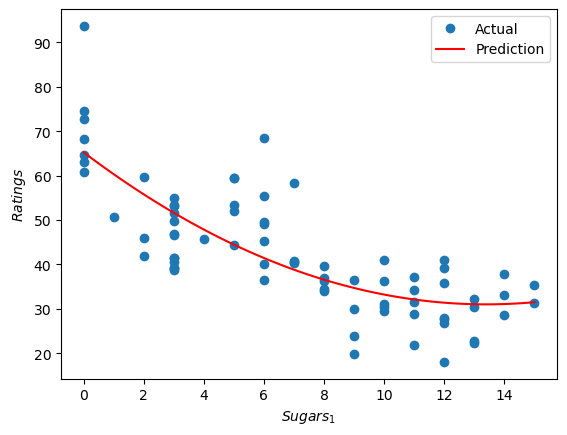

In [23]:
plt.plot(x, y, 'o', label='Actual')
plt.plot(X_new, y_new, 'r-', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Ratings$')
plt.show()

#### 2) 고차 다항 회귀 분석코드 실습

In [54]:
df_cereal = pd.read_csv('./data/cereal.csv')
df_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [55]:
df_cereal = df_cereal.iloc[:, 3:]
df_cereal

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [56]:
X = df_cereal.iloc[:, :-1].values
y = df_cereal.iloc[:, -1].values
X

array([[ 7.00e+01,  4.00e+00,  1.00e+00,  1.30e+02,  1.00e+01,  5.00e+00,
         6.00e+00,  2.80e+02,  2.50e+01,  3.00e+00,  1.00e+00,  3.30e-01],
       [ 1.20e+02,  3.00e+00,  5.00e+00,  1.50e+01,  2.00e+00,  8.00e+00,
         8.00e+00,  1.35e+02,  0.00e+00,  3.00e+00,  1.00e+00,  1.00e+00],
       [ 7.00e+01,  4.00e+00,  1.00e+00,  2.60e+02,  9.00e+00,  7.00e+00,
         5.00e+00,  3.20e+02,  2.50e+01,  3.00e+00,  1.00e+00,  3.30e-01],
       [ 5.00e+01,  4.00e+00,  0.00e+00,  1.40e+02,  1.40e+01,  8.00e+00,
         0.00e+00,  3.30e+02,  2.50e+01,  3.00e+00,  1.00e+00,  5.00e-01],
       [ 1.10e+02,  2.00e+00,  2.00e+00,  2.00e+02,  1.00e+00,  1.40e+01,
         8.00e+00, -1.00e+00,  2.50e+01,  3.00e+00,  1.00e+00,  7.50e-01],
       [ 1.10e+02,  2.00e+00,  2.00e+00,  1.80e+02,  1.50e+00,  1.05e+01,
         1.00e+01,  7.00e+01,  2.50e+01,  1.00e+00,  1.00e+00,  7.50e-01],
       [ 1.10e+02,  2.00e+00,  0.00e+00,  1.25e+02,  1.00e+00,  1.10e+01,
         1.40e+01,  3.00e+01,  2

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (24, 12) (53,) (24,)


In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

In [60]:
from sklearn.linear_model import LinearRegression
X_train_poly = poly_reg.fit_transform(X_train_sc)
lr_reg = LinearRegression()
lr_reg.fit(X_train_poly, y_train)

LinearRegression()

In [61]:
import numpy as np
X_test_poly = poly_reg.transform(X_test_sc)
y_pred = lr_reg.predict(X_test_poly)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
rmse = np.sqrt(mse)
acc = lr_reg.score(poly_reg.transform(X_test_sc), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc*100,3)))

MSE	21.254
MAE	2.97
RMSE	4.61
ACC	84.433%
